<p  style="z-index: 101;background: #fde073;text-align: center;line-height: 2.5;overflow: hidden;font-size:22px;">Please <a href="https://github.com/ECSIM/opem#cite" target="_blank">cite us</a> if you use the software</p>

#  Amphlett Static Model

### Version 1.4

<ul>
    <li><a href="#Overview">Overview</a></li>
    <li><a href="#Nernst-Voltage">Nernst Voltage</a></li>
    <li><a href="#PEM-Losses-Model">PEM Losses Model</a></li>
    <ul>
        <li><a href="#Activation">Activation</a></li>
        <li><a href="#Ohmic">Ohmic</a></li>
        <li><a href="#Concentration">Concentration</a></li>
        <li><a href="#VCell-&-VStack">VCell & VStack</a></li>
    </ul>
    <li><a href="#Power-of-PEMFC">Power of PEMFC</a></li>
    <li><a href="#Efficiency-of-PEMFC">Efficiency of PEMFC</a></li>
    <li><a href="#Linear-Approximation">Linear Approximation</a></li>
    <li><a href="#Overall-Parameters">Overall Parameters</a></li>
    <li><a href="#Full-Run">Full Run</a></li>
    <li><a href="#Plot">Plot</a></li>
    <li><a href="#Parameters">Parameters</a></li>
    <li><a href="#Reference">Reference</a></li>   
</ul>

## Overview

<p style="text-align:justify;">
The Amphlett static model has been used to predict the performance of proton exchange membrane fuel cell. Key concepts in Amphlett static model are Nernst voltage, activation polarization loss, ohmic polarization loss and concentration polarization loss. Amphlett static model has a mechanistic and empirical approach to describe the performance of proton exchange membrane fuel cell. The ideal standard potential of an H2/O2 fuel cell is 1.229 V with liquid water product. The actual cell potential is decreased from its reference potential because of irreversible losses.
</p>

<div style="text-align:center;">
   
<img src="images/Static-Model-Graphic.jpg" onerror='this.src="../images/Static-Model-Graphic.jpg"'>  
<p style="text-align:center;">Fig1. Graphical Abstract of Static Models</p>
</div>

## Nernst Voltage

$$E_{Nernst}(V)=1.229-(8.5\times10^{-4})(T-298.15)+(4.308\times10^{-5})(T)[\ln(P_{H2})+0.5ln(P_{O2})]$$


In [1]:
from opem.Static.Amphlett import Enernst_Calc
Enernst=Enernst_Calc(T=343.15,PH2=1,PO2=1)
Enernst

1.19075

* Notice : from opem.Amphlett in version (0.3>)

## PEM Losses Model

### Activation

$$\eta_{activation}=\xi_{1}+\xi_{2}T+\xi_{3}T[ln(C_{O_{2}})]+\xi_{4}T[ln(i)]$$

$$\xi_{1}=-0.948$$

$$\xi_{2}=0.00286+0.0002\times ln(A)+(4.3\times10^{-5})[ln(C_{H_{2}})]$$

$$\xi_{3}=7.6\times10^{-5}$$

$$\xi_{4}=-1.93\times10^{-4}$$

$$C_{H_{2}}=\frac{P_{H_2}}{1.09\times10^{6}\times exp(\frac{77}{T})}$$

$$C_{O_{2}}=\frac{P_{O_2}}{5.08\times10^{6}\times exp(\frac{-498}{T})}$$

In [2]:
from opem.Params import xi1,xi3,xi4
print("XI1="+str(xi1))
print("XI3="+str(xi3))
print("XI4="+str(xi4))

XI1=-0.948
XI3=7.6e-05
XI4=-0.000193


In [3]:
from opem.Static.Amphlett import CO2_Calc,CH2_Calc,Xi2_Calc
CO2=CO2_Calc(PO2=1,T=343.15)
CH2=CH2_Calc(PH2=1,T=343.15)
XI2=Xi2_Calc(A=50.6,PH2=1,T=343.15)
print("XI2="+str(XI2))
print("CO2="+str(CO2))
print("CH2="+str(CH2))

XI2=0.0030373688787134006
CO2=8.402541445801334e-07
CH2=7.330294784824117e-07


In [4]:
from opem.Static.Amphlett import Eta_Act_Calc
Eta_Act=Eta_Act_Calc(T=343.15,PO2=1 , PH2=1, i=2, A=50.6)
Eta_Act

0.3164719546471556

### Ohmic

$$\eta_{ohmic}=i(R_{electronic}+R_{Proton})$$

$$R_{Proton}=\frac{\rho_m\times I}{A}$$

$$\rho_m=\frac{181.6[1+0.03(\frac{i}{A})+0.062(\frac{T}{303})^2(\frac{i}{A})^{2.5}]}{[\lambda-0.634-3(\frac{i}{A})]exp[4.18(\frac{T-303}{T})]}$$

* R-Electronic Should be approximately constant over the relatively narrow
temperature range of PEM fuel cell operation.
Therefore, the parameter R-Electronic can be taken as a constant, but
is generally difficult to predict and, therefore, is initially an unknown.

In [5]:
from opem.Static.Amphlett import Rho_Calc
Rho_Calc(i=2, A=50.6, T=343.15, lambda_param=23)

5.011385192458396

In [6]:
from opem.Static.Amphlett import Eta_Ohmic_Calc
Eta_Ohmic=Eta_Ohmic_Calc(i=2, l=0.0178, A=50.6, T=343.15, lambda_param=23, R_elec=0)
Eta_Ohmic

0.0035257966966703337

### Concentration

$$B=\frac{RT}{nF}$$

$$\eta_{Concentration}=-B\times ln(1-\frac{J}{J_{Max}})$$

$$J=\frac{i}{A}$$

$$J_{Max}=\frac{i_L}{A}$$

In [7]:
from opem.Static.Amphlett import Eta_Conc_Calc
Eta_Conc=Eta_Conc_Calc(i=2, A=50.6, B=0.015, JMax=1.5)
Eta_Conc

0.00040055784671142223

### VCell & VStack

$$Loss=\eta_{Activation}+\eta_{Ohmic}+\eta_{Concentration}$$

$$V_{cell}=E_{Nernst}-Loss$$

$$V_{Stack}=N\times V_{cell}$$

In [8]:
from opem.Static.Amphlett import Loss_Calc,Vcell_Calc,VStack_Calc
Loss=Loss_Calc(Eta_Act=Eta_Act,Eta_Conc=Eta_Conc,Eta_Ohmic=Eta_Ohmic)
Loss

0.3203983091905374

In [9]:
Vcell=Vcell_Calc(Enernst=Enernst,Loss=Loss)
Vcell

0.8703516908094626

In [10]:
VStack=VStack_Calc(Vcell=Vcell,N=2)
VStack

1.7407033816189252

## Power of PEMFC

$$P=V_{cell}\times i$$

$$P_{Stack}=N\times P$$

$$P_{Thermal}=i\times(N \times E_{th}-V_{Stack})$$

$$E_{th}=\frac{-\Delta H}{nF}=1.23V$$

In [11]:
from opem.Static.Amphlett import Power_Calc,PowerStack_Calc,Power_Thermal_Calc
Power=Power_Calc(Vcell=Vcell,i=2)
Power

1.7407033816189252

In [12]:
PowerStack_Calc(Power=Power,N=2)

3.4814067632378505

In [13]:
Power_Thermal_Calc(VStack=VStack,N=2,i=2)

1.4385932367621495

## Efficiency of PEMFC

$$\eta=\frac{\mu_F\times V_{cell}}{HHV}$$

In [14]:
from opem.Params import uF,HHV
from opem.Static.Amphlett import Efficiency_Calc

In [15]:
uF

0.95

In [16]:
HHV

1.482

In [17]:
Efficiency_Calc(Vcell=Vcell)

0.5579177505188863

## Linear Approximation

Sometimes quick calculations regarding fuel cell efficiency–power-size relationships need to be made. Linear approximation is a good method to find a rough estimate of the value of polarization function at a particular point. A linear polarization curve has the following form:
$$V_{cell}=V_0-kI$$
where V0 is the intercept (actual open circuit voltage is always higher) and k is the slope of the curve.

* Notice : <a href="https://en.wikipedia.org/wiki/Simple_linear_regression">Simple linear regression</a> used for this approximation

<table style="text-align:center;">
    <tr>
        <td>$$Parameter$$</td>
        <td>$$Description$$</td>
        <td>$$Unit$$</td>
    </tr> 
    <tr>
        <td>$$V_0$$</td>
        <td style="text-align:center;">Intercept of the curve obtained by linear approximation</td>
        <td>$$V$$</td>
    </tr>
    <tr>
        <td>$$k$$</td>
        <td style="text-align:center;">Slope of the curve obtained by linear approximation</td>
        <td>$$A^{-1}$$</td>
    </tr>
    <tr>
        <td>$$P_{max}$$</td>
        <td style="text-align:center;">Maximum power obtained by linear approximation</td>
        <td>$$W$$</td>
    </tr>
    <tr>
        <td>$$V_{FC}|P_{max}$$</td>
        <td style="text-align:center;">Cell voltage at maximum power obtained by linear approximation</td>
        <td>$$V$$</td>
    </tr>
   
     
    
    
    
</table>

* Notice : These parameters are only available in HTML report

## Overall Parameters

<table style="text-align:center;">
    <tr>
        <td>$$Parameter$$</td>
        <td>$$Description$$</td>
        <td>$$Unit$$</td>
    </tr> 
    <tr>
        <td>$$\eta|P_{Max}$$</td>
        <td style="text-align:center;">Cell efficiency at maximum power</td>
        <td>$$--$$</td>
    </tr>
    <tr>
        <td>$$P_{Max}$$</td>
        <td style="text-align:center;">Maximum power </td>
        <td>$$W$$</td>
    </tr>
    <tr>
        <td>$$P_{Elec} $$</td>
        <td style="text-align:center;">Total electrical power </td>
        <td>$$W$$</td>
    </tr>
    <tr>
        <td>$$P_{Thermal} $$</td>
        <td style="text-align:center;">Total thermal power   </td>
        <td>$$W$$</td>
    </tr>
    <tr>
        <td>$$V_{FC}|P_{Max}$$</td>
        <td style="text-align:center;">Cell voltage at maximum power </td>
        <td>$$V$$</td>
    </tr>
   
     
    
    
    
</table>

* Notice : P(Thermal) & P(Elec) calculated by <a href="https://en.wikipedia.org/wiki/Simpson%27s_rule">Simpson's Rule</a>

* Notice : These parameters are only available in HTML report

## Full Run

* Run from `i`=0 to `i`=75 with `step`=0.1

In [18]:
Test_Vector={
    "T": 343.15,
    "PH2": 1,
    "PO2": 1,
    "i-start": 0,
    "i-stop": 75,
    "i-step": 0.1,
    "A": 50.6,
    "l": 0.0178,
    "lambda": 23,
    "N": 1,
    "R": 0,
    "JMax": 1.5,
    "Name": "Amphlett_Test"}

* Notice : "Name", new in version 0.5

In [19]:
from opem.Static.Amphlett import Static_Analysis
data=Static_Analysis(InputMethod=Test_Vector,TestMode=True,PrintMode=True,ReportMode=True)

###########
Amphlett-Model Simulation
###########
Analyzing . . .
I : 0
Enernst : 1.19075 V
Eta Activation : 0 V
Eta Concentration : 0 V
Eta Ohmic : 0 V
Loss : 0 V
PEM Efficiency : 0.763301282051282 
Power : 0.0 W
Power-Stack : 0.0 W
Power-Thermal : 0.0 W
VStack : 1.19075 V
Vcell : 1.19075 V
###########
I : 0.1
Enernst : 1.19075 V
Eta Activation : 0.11807074742083559 V
Eta Concentration : 1.9492837182237548e-05 V
Eta Ohmic : 0.00017520002843124318 V
Loss : 0.11826544028644907 V
PEM Efficiency : 0.6874901023804812 
Power : 0.10724845597135509 W
Power-Stack : 0.10724845597135509 W
Power-Thermal : 0.015751544028644916 W
VStack : 1.0724845597135508 V
Vcell : 1.0724845597135508 V
###########
I : 0.2
Enernst : 1.19075 V
Eta Activation : 0.1639764642376006 V
Eta Concentration : 3.90114074903386e-05 V
Eta Ohmic : 0.0003505137928660484 V
Loss : 0.164365989437957 V
PEM Efficiency : 0.6579384683090018 
Power : 0.20527680211240862 W
Power-Stack : 0.20527680211240862 W
Power-Thermal : 0.04072319788

Power : 7.672340181621459 W
Power-Stack : 7.672340181621459 W
Power-Thermal : 4.996659818378541 W
VStack : 0.7448873962739281 V
Vcell : 0.7448873962739281 V
###########
I : 10.4
Enernst : 1.19075 V
Eta Activation : 0.42565923566962544 V
Eta Concentration : 0.0021788607199227715 V
Eta Ohmic : 0.01887531323011039 V
Loss : 0.4467134096196586 V
PEM Efficiency : 0.47694653229509065 
Power : 7.737980539955551 W
Power-Stack : 7.737980539955551 W
Power-Thermal : 5.054019460044449 W
VStack : 0.7440365903803414 V
Vcell : 0.7440365903803414 V
###########
I : 10.5
Enernst : 1.19075 V
Eta Activation : 0.4262930007930505 V
Eta Concentration : 0.0022014509685666234 V
Eta Ohmic : 0.019063821953670217 V
Loss : 0.44755827371528734 V
PEM Efficiency : 0.47640495274661065 
Power : 7.8035131259894825 W
Power-Stack : 7.8035131259894825 W
Power-Thermal : 5.1114868740105175 W
VStack : 0.7431917262847126 V
Vcell : 0.7431917262847126 V
###########
I : 10.6
Enernst : 1.19075 V
Eta Activation : 0.4269207585737348 

PEM Efficiency : 0.44301320623552787 
Power : 12.439810831093624 W
Power-Stack : 12.439810831093624 W
Power-Thermal : 9.700189168906377 W
VStack : 0.6911006017274235 V
Vcell : 0.6911006017274235 V
###########
I : 18.1
Enernst : 1.19075 V
Eta Activation : 0.4623565488826571 V
Eta Concentration : 0.004027932407431953 V
Eta Ohmic : 0.03385856053027712 V
Loss : 0.5002430418203662 V
PEM Efficiency : 0.4426326654997652 
Power : 12.498175943051374 W
Power-Stack : 12.498175943051374 W
Power-Thermal : 9.764824056948628 W
VStack : 0.6905069581796338 V
Vcell : 0.6905069581796338 V
###########
I : 18.2
Enernst : 1.19075 V
Eta Activation : 0.4627214420922232 V
Eta Concentration : 0.004053534690645012 V
Eta Ohmic : 0.034059919280253294 V
Loss : 0.5008348960631216 V
PEM Efficiency : 0.44225327175440915 
Power : 12.556454891651185 W
Power-Stack : 12.556454891651185 W
Power-Thermal : 9.829545108348812 W
VStack : 0.6899151039368784 V
Vcell : 0.6899151039368784 V
###########
I : 18.3
Enernst : 1.19075 V


Vcell : 0.6696298220644864 V
###########
I : 21.9
Enernst : 1.19075 V
Eta Activation : 0.47497792048953624 V
Eta Concentration : 0.005033403739429013 V
Eta Ohmic : 0.04164806977791138 V
Loss : 0.5216593940068767 V
PEM Efficiency : 0.4289042346109765 
Power : 14.6530842712494 W
Power-Stack : 14.6530842712494 W
Power-Thermal : 12.283915728750598 W
VStack : 0.6690906059931233 V
Vcell : 0.6690906059931233 V
###########
I : 22.0
Enernst : 1.19075 V
Eta Activation : 0.4752796428792825 V
Eta Concentration : 0.00506080933552597 V
Eta Ohmic : 0.041857040089022135 V
Loss : 0.5221974923038306 V
PEM Efficiency : 0.42855929980523677 
Power : 14.708155169315726 W
Power-Stack : 14.708155169315726 W
Power-Thermal : 12.351844830684273 W
VStack : 0.6685525076961694 V
Vcell : 0.6685525076961694 V
###########
I : 22.1
Enernst : 1.19075 V
Eta Activation : 0.4755799969088182 V
Eta Concentration : 0.005088265824124011 V
Eta Ohmic : 0.042066223485767815 V
Loss : 0.52273448621871 V
PEM Efficiency : 0.428215072

VStack : 0.6305790101558829 V
Vcell : 0.6305790101558829 V
###########
I : 29.6
Enernst : 1.19075 V
Eta Activation : 0.4949315888438367 V
Eta Concentration : 0.0073080074120263905 V
Eta Ohmic : 0.058414654047045406 V
Loss : 0.5606542503029085 V
PEM Efficiency : 0.40390753185710987 
Power : 18.65083419103391 W
Power-Stack : 18.65083419103391 W
Power-Thermal : 17.757165808966093 W
VStack : 0.6300957496970915 V
Vcell : 0.6300957496970915 V
###########
I : 29.7
Enernst : 1.19075 V
Eta Activation : 0.49515495482285377 V
Eta Concentration : 0.007339975672828931 V
Eta Ohmic : 0.058642163620874266 V
Loss : 0.561137094116557 V
PEM Efficiency : 0.4035980165919506 
Power : 18.699503304738258 W
Power-Stack : 18.699503304738258 W
Power-Thermal : 17.83149669526174 W
VStack : 0.629612905883443 V
Vcell : 0.629612905883443 V
###########
I : 29.8
Enernst : 1.19075 V
Eta Activation : 0.49537756999044114 V
Eta Concentration : 0.0073720132040232264 V
Eta Ohmic : 0.058869944297911946 V
Loss : 0.561619527492

Power-Stack : 22.103688815175087 W
Power-Thermal : 23.652311184824914 W
VStack : 0.5941851832036313 V
Vcell : 0.5941851832036313 V
###########
I : 37.3
Enernst : 1.19075 V
Eta Activation : 0.5102447469180852 V
Eta Concentration : 0.00999730366914512 V
Eta Ohmic : 0.07678942808770041 V
Loss : 0.5970314786749307 V
PEM Efficiency : 0.38058879572119825 
Power : 22.145700845425083 W
Power-Stack : 22.145700845425083 W
Power-Thermal : 23.73329915457491 W
VStack : 0.5937185213250693 V
Vcell : 0.5937185213250693 V
###########
I : 37.4
Enernst : 1.19075 V
Eta Activation : 0.5104220641592153 V
Eta Concentration : 0.010035657295998599 V
Eta Ohmic : 0.07704038205695209 V
Loss : 0.597498103512166 V
PEM Efficiency : 0.380289677235791 
Power : 22.18762092864499 W
Power-Stack : 22.18762092864499 W
Power-Thermal : 23.81437907135501 W
VStack : 0.5932518964878339 V
Vcell : 0.5932518964878339 V
###########
I : 37.5
Enernst : 1.19075 V
Eta Activation : 0.5105989079225026 V
Eta Concentration : 0.010074110672

Power : 25.057775512237594 W
Power-Stack : 25.057775512237594 W
Power-Thermal : 30.169224487762403 W
VStack : 0.558079632789256 V
Vcell : 0.558079632789256 V
###########
I : 45.0
Enernst : 1.19075 V
Eta Activation : 0.5226736908697748 V
Eta Concentration : 0.013286978453120183 V
Eta Ohmic : 0.09718460567125091 V
Loss : 0.6331452749941459 V
PEM Efficiency : 0.3574389262858039 
Power : 25.092212625263436 W
Power-Stack : 25.092212625263436 W
Power-Thermal : 30.257787374736562 W
VStack : 0.5576047250058541 V
Vcell : 0.5576047250058541 V
###########
I : 45.1
Enernst : 1.19075 V
Eta Activation : 0.5228207008080519 V
Eta Concentration : 0.013334904961409485 V
Eta Ohmic : 0.09746482628941297 V
Loss : 0.6336204320588743 V
PEM Efficiency : 0.3571343384237985 
Power : 25.126543514144767 W
Power-Stack : 25.126543514144767 W
Power-Thermal : 30.34645648585523 W
VStack : 0.5571295679411257 V
Vcell : 0.5571295679411257 V
###########
I : 45.2
Enernst : 1.19075 V
Eta Activation : 0.5229673851426555 V
Et

Loss : 0.670239224380769 V
PEM Efficiency : 0.3336607536020711 
Power : 27.37886679757155 W
Power-Stack : 27.37886679757155 W
Power-Thermal : 37.31913320242845 W
VStack : 0.520510775619231 V
Vcell : 0.520510775619231 V
###########
I : 52.7
Enernst : 1.19075 V
Eta Activation : 0.5331345919896054 V
Eta Concentration : 0.017524507432395874 V
Eta Ohmic : 0.12008528045599057 V
Loss : 0.6707443798779918 V
PEM Efficiency : 0.33333693597564623 
Power : 27.40429618042983 W
Power-Stack : 27.40429618042983 W
Power-Thermal : 37.41670381957017 W
VStack : 0.5200056201220081 V
Vcell : 0.5200056201220081 V
###########
I : 52.8
Enernst : 1.19075 V
Eta Activation : 0.5332601426433197 V
Eta Concentration : 0.017588374982510927 V
Eta Ohmic : 0.12040157043709136 V
Loss : 0.671250088062922 V
PEM Efficiency : 0.3330127640622295 
Power : 27.42959535027772 W
Power-Stack : 27.42959535027772 W
Power-Thermal : 37.51440464972228 W
VStack : 0.519499911937078 V
Vcell : 0.519499911937078 V
###########
I : 52.9
Enerns

Eta Ohmic : 0.14569552840558953 V
Loss : 0.7111446512032252 V
PEM Efficiency : 0.30743932615177866 
Power : 28.920202532445515 W
Power-Stack : 28.920202532445515 W
Power-Thermal : 45.24879746755448 W
VStack : 0.47960534879677474 V
Vcell : 0.47960534879677474 V
###########
I : 60.4
Enernst : 1.19075 V
Eta Activation : 0.5421663392229525 V
Eta Concentration : 0.02348760610618271 V
Eta Ohmic : 0.14605512979113192 V
Loss : 0.7117090751202672 V
PEM Efficiency : 0.30707751594854665 
Power : 28.934071862735863 W
Power-Stack : 28.934071862735863 W
Power-Thermal : 45.35792813726414 W
VStack : 0.4790409248797328 V
Vcell : 0.4790409248797328 V
###########
I : 60.5
Enernst : 1.19075 V
Eta Activation : 0.5422758974778792 V
Eta Concentration : 0.023583304271091482 V
Eta Ohmic : 0.14641535706026407 V
Loss : 0.7122745588092347 V
PEM Efficiency : 0.3067150264043367 
Power : 28.947764192041298 W
Power-Stack : 28.947764192041298 W
Power-Thermal : 45.4672358079587 W
VStack : 0.47847544119076524 V
Vcell : 

Eta Activation : 0.5500155831534085 V
Eta Concentration : 0.03345257217035065 V
Eta Ohmic : 0.1753312731505694 V
Loss : 0.7587994284743286 V
PEM Efficiency : 0.2768913920036355 
Power : 29.372638863745657 W
Power-Stack : 29.372638863745657 W
Power-Thermal : 54.267361136254344 W
VStack : 0.4319505715256714 V
Vcell : 0.4319505715256714 V
###########
I : 68.1
Enernst : 1.19075 V
Eta Activation : 0.5501129056543901 V
Eta Concentration : 0.033640922677493953 V
Eta Ohmic : 0.17574372502566962 V
Loss : 0.7594975533575536 V
PEM Efficiency : 0.2764438760528502 
Power : 29.368291616350593 W
Power-Stack : 29.368291616350593 W
Power-Thermal : 54.3947083836494 W
VStack : 0.43125244664244633 V
Vcell : 0.43125244664244633 V
###########
I : 68.2
Enernst : 1.19075 V
Eta Activation : 0.5502100853490095 V
Eta Concentration : 0.03383170358077348 V
Eta Ohmic : 0.17615692818778783 V
Loss : 0.7601987171175708 V
PEM Efficiency : 0.27599441210412123 
Power : 29.363597492581672 W
Power-Stack : 29.36359749258167

* Notice : "Status", "V0", "K" and "EFF" , new in version 0.8

In [20]:
data_2=Static_Analysis(InputMethod=Test_Vector,TestMode=True,PrintMode=True,ReportMode=False)

###########
Amphlett-Model Simulation
###########
Analyzing . . .
Done!


In [21]:
Static_Analysis(InputMethod={},TestMode=True,PrintMode=False,ReportMode=True)

{'Message': '[Error] Amphlett Simulation Failed!(Check Your Inputs)',
 'Status': False}

### Parameters

1. `TestMode` : Active test mode and get/return data as `dict`, (Default : `False`)
2. `ReportMode` : Generate reports(`.csv`,`.opem`,`.html`) and print result in console, (Default : `True`)
3. `PrintMode` : Control printing in console, (Default : `True`)
4. `Folder` : Reports folder, (Default : `os.getcwd()`)

* Notice : "PrintMode" & "ReportMode" , new in version 0.5

* Notice : "Folder" , new in version 1.4

## Plot

In [22]:
import sys
!{sys.executable} -m pip -qqq install matplotlib;
import matplotlib.pyplot as plt

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
samila 1.1 requires Pillow>=6.2, but you have pillow 4.2.1 which is incompatible.


In [23]:
def plot_func(x,y,x_label,y_label,color='green',legend=[],multi=False):
    plt.figure()
    plt.grid()
    if multi==True:
        for index,y_item in enumerate(y):
            plt.plot(x,y_item,color=color[index])
    else:
        plt.plot(x,y,color=color)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    if len(legend)!=0:
        plt.legend(legend)
    plt.show()


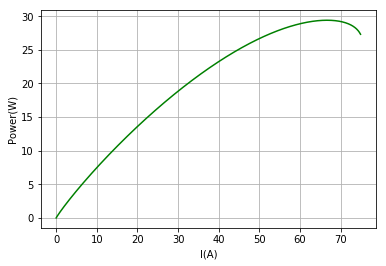

In [24]:
plot_func(data["I"],data["P"],"I(A)","Power(W)")

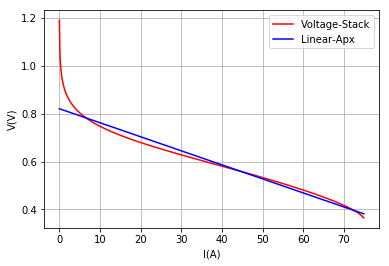

In [25]:
plot_func(data["I"],[data["V"],data["VE"]],"I(A)","V(V)",["red","blue"],legend=["Voltage-Stack","Linear-Apx"],multi=True)

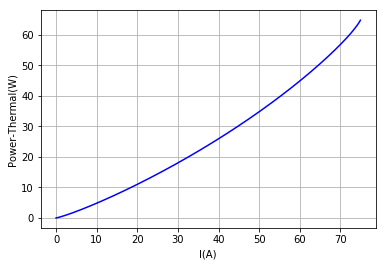

In [26]:
plot_func(data["I"],data["Ph"],"I(A)","Power-Thermal(W)","blue")

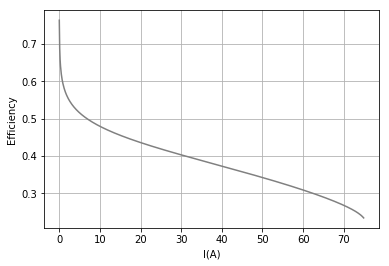

In [27]:
plot_func(data["I"],data["EFF"],"I(A)","Efficiency","gray")

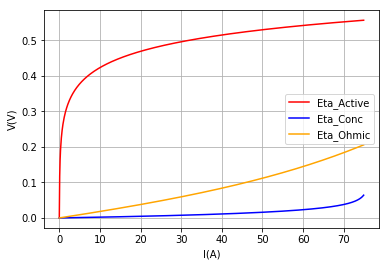

In [28]:
plot_func(data["I"],[data["Eta_Active"],data["Eta_Conc"],data["Eta_Ohmic"]],"I(A)","V(V)",["red","blue","orange"],
          legend=["Eta_Active","Eta_Conc","Eta_Ohmic"],multi=True)

<a href="Amphlett/Amphlett_Test.html">HTML File</a>

<a href="Amphlett/Amphlett_Test.opem">OPEM File</a>

<a href="Amphlett/Amphlett_Test.csv">CSV File</a>

## Parameters

Inputs, Constants & Middle Values
1. User : User input
2. System : Simulator calculation (middle value)

<table style="text-align:center;">
    <tr>
        <td>$$Parameter$$</td>
        <td>$$Description$$</td>
        <td>$$Unit$$</td>
        <td>$$Value$$</td>
    </tr> 
    <tr>
        <td>$$P_{H2}$$</td>
        <td style="text-align:center;">Partial pressure</td>
        <td>$$atm$$</td>
        <td>$$User$$</td>
    </tr>
    <tr>
        <td>$$P_{O2}$$</td>
        <td style="text-align:center;">Partial pressure</td>
        <td>$$atm$$</td>
        <td>$$User$$</td>      
    </tr>
    <tr>
        <td>$$T$$</td>
        <td style="text-align:center;">Cell operation temperature</td>
        <td>$$K$$</td>
        <td>$$User$$</td>
    </tr>
    <tr>
        <td>$$l$$</td>
        <td style="text-align:center;">Membrane thickness</td>
        <td>$$cm$$</td>
        <td>$$User$$</td>
    </tr>
    <tr>
        <td>$$A$$</td>
        <td style="text-align:center;">Active area</td>
        <td>$$cm^2$$</td>
        <td>$$User$$</td>
    </tr>
         <tr>
        <td>$$\lambda$$</td>
        <td style="text-align:center;">An adjustable parameter with a possible minimum value of 14 and a maximum value of 23</td>
        <td>$$--$$</td>
        <td>$$User$$</td>
    </tr>
     <tr>
        <td>$$J_{Max}$$</td>
        <td style="text-align:center;">Maximum current density of the cell</td>
        <td>$$Acm^{-2}$$</td>
        <td>$$User$$</td>
    </tr>
              <tr>
        <td>$$N$$</td>
        <td style="text-align:center;">Number of single cells</td>
        <td>$$--$$</td>
        <td>$$User$$</td>
    </tr> 
     <tr>
        <td>$$R_{electronic}$$</td>
        <td style="text-align:center;">R-Electronic</td>
        <td>$$\Omega$$</td>
        <td>$$User$$</td>
    </tr>
     <tr>
        <td>$$i_{start}$$</td>
        <td style="text-align:center;">Cell operating current start point</td>
        <td>$$A$$</td>
        <td>$$User$$</td>
    </tr>   
    <tr>
        <td>$$i_{step}$$</td>
        <td style="text-align:center;">Cell operating current step</td>
        <td>$$A$$</td>
        <td>$$User$$</td>
    </tr>  
    <tr>
        <td>$$i_{stop}$$</td>
        <td style="text-align:center;">Cell operating current end point</td>
        <td>$$A$$</td>
        <td>$$User$$</td>
    </tr> 
    <tr>
        <td>$$B$$</td>
        <td style="text-align:center;">Constant in the mass transfer term</td>
        <td>$$V$$</td>
        <td>$$System$$</td>
    </tr>
    <tr>
        <td>$$\rho$$</td>
        <td style="text-align:center;">Membrane specific resistivity</td>
        <td>$$\Omega cm$$</td>
        <td>$$System$$</td>
    </tr>
     <tr>
        <td>$$J$$</td>
        <td style="text-align:center;">Actual current density of the cell </td>
        <td>$$Acm^{-2}$$</td>
        <td>$$System$$</td>
    </tr>  
    <tr>
        <td>$$C_{O_2}$$</td>
        <td style="text-align:center;">Concentration of oxygen in the catalytic interface of the cathode</td>
        <td>$$molcm^{-3}$$</td>
        <td>$$System$$</td>
    </tr> 
     <tr>
        <td>$$C_{H_2}$$</td>
        <td style="text-align:center;">Concentration of hydrogen in the catalytic interface of the anode</td>
        <td>$$molcm^{-3}$$</td>
        <td>$$System$$</td>
    </tr> 
    <tr>
        <td>$$R_{Proton}$$</td>
        <td style="text-align:center;">Resistance to proton flow</td>
        <td>$$\Omega$$</td>
        <td>$$System$$</td>
    </tr> 
     <tr>
        <td>$$\xi_2$$</td>
        <td style="text-align:center;">Parametric coefficients for cell model</td>
        <td>$$--$$</td>
        <td>$$System$$</td>
    </tr> 
     <tr>
        <td>$$\xi_1$$</td>
        <td style="text-align:center;">Parametric coefficients for cell model</td>
        <td>$$--$$</td>
        <td>$$-0.948$$</td>
    </tr> 
     <tr>
        <td>$$\xi_3$$</td>
        <td style="text-align:center;">Parametric coefficients for cell model</td>
        <td>$$--$$</td>
        <td>$$7.6\times10^{-5}$$</td>
    </tr> 
     <tr>
        <td>$$\xi_4$$</td>
        <td style="text-align:center;">Parametric coefficients for cell model</td>
        <td>$$--$$</td>
        <td>$$-1.93\times10^{-4}$$</td>
    </tr> 
                 <tr>
    <td>$$R$$</td>
        <td style="text-align:center;">Universal gas constant</td>
        <td>$$J.kmol^{-1}.K^{-1}$$</td>
        <td>$$8314.47$$</td>
    </tr>
             <tr>
    <td>$$F$$</td>
        <td style="text-align:center;">Faraday’s constant</td>
        <td>$$C.kmol^{-1}$$</td>
        <td>$$96484600$$</td>
    </tr>
                <tr>
    <td>$$n$$</td>
        <td style="text-align:center;">Number of moles of electrons transferred in the balanced equation occurring in the fuel cell</td>
        <td>$$--$$</td>
        <td>$$2$$</td>
    </tr>
          <tr>
        <td>$$\mu_F$$</td>
        <td style="text-align:center;">The fuel utilization</td>
        <td>$$--$$</td>
        <td>$$0.95$$</td>
    </tr>
          <tr>
    <td>$$HHV$$</td>
        <td style="text-align:center;">Higher heating value potential</td>
        <td>$$V$$</td>
        <td>$$1.482$$</td>
    </tr>   
          <tr>
    <td>$$E_{th}$$</td>
        <td style="text-align:center;">Theoretical potential</td>
        <td>$$V$$</td>
        <td>$$1.23$$</td>
    </tr>
     
    
    
    
</table>

## Reference
<blockquote>
1-J. C. Amphlett, R. M. Baumert, R. F. Mann, B. A. Peppley, and P. R. Roberge. 1995. "Performance Modeling of the Ballard Mark IV Solid Polymer Electrolyte Fuel Cell." J. Electrochem. Soc. (The Electrochemical Society, Inc.) 142 (1): 9-15. doi: 10.1149/1.2043959.
</blockquote>
<blockquote>
2-Jeferson M. Correa, Felix A. Farret, Vladimir A. Popov, Marcelo G. Simoes. 2005. "Sensitivity Analysis of the Modeling Parameters Used in Simulation of Proton Exchange Membrane Fuel Cells." IEEE Transactions on Energy Conversion (IEEE) 20 (1): 211-218. doi:10.1109/TEC.2004.842382.
</blockquote>
<blockquote>
3-Larminie, J., Dicks, A., & McDonald, M. S. 2003. Fuel cell systems explained (Vol. 2, pp. 207-225). Chichester, UK: J. Wiley. doi: 10.1002/9781118706992.
</blockquote>
